In this notebook, I clean the distritos names data (distritos/nombres_distritos.csv) and I then filter those districts located in the city of Madrid (those for which 'name' contains "Madrid distrito"). Then, I map the district codes to actual district names (i.e. 'Madrid distrito 10': 'Latina') and save the data as PROCESSED_nombres_distritos.csv.

I clean the original distritos data (zonificacion_distritos.shp) to only contain distritos in the city of Madrid (distritos/madrid_gdf.geojson). I do this by filtering the original geodataframe based on the IDs corresponding to the Madrid districts.

In [26]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import config as cfg

In [27]:
mobility_data = cfg.MOBILITY_DATA
geometria_data = cfg.GEOMETRIA_DATA
zonificacion_data = cfg.ZONIFICACION_DATA

In [28]:
# tramos_info = pd.read_csv(r'C:\Users\rqg886\Desktop\THESIS\mobility_data\20220801_Tramos_info_odmatrix.csv.gz', compression='gzip', sep=';')
# relaciones = pd.read_csv(r'C:\Users\rqg886\Desktop\THESIS\mobility_data\20220801_Relaciones_tramos_rutas.csv.gz', compression='gzip', sep=';')

In [29]:
nombres_distritos = pd.read_csv(zonificacion_data / 'distritos/nombres_distritos.csv', sep = '|')
poblacion_distritos = pd.read_csv(zonificacion_data / 'distritos/poblacion_distritos.csv', sep = '|')

In [31]:
madrid_ccaa = nombres_distritos[nombres_distritos['ID'].str.startswith("28")] # filtering districts within Madrid Comunidad Autonoma
ciudad_madrid = madrid_ccaa[madrid_ccaa['name'].str.contains("Madrid distrito", case=False, na=False)] # filtering only districts from the city of Madrid
# FIXME: Filter based on these data:
# https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Areas-de-informacion-estadistica/Territorio-climatologia-y-medio-ambiente/Territorio/Mapas-de-Distritos-y-Barrios/?vgnextfmt=default&vgnextoid=240d64c49579f410VgnVCM1000000b205a0aRCRD&vgnextchannel=e59b40ebd232a210VgnVCM1000000b205a0aRCRD

In [32]:
# Mapping of district codes to actual district names
district_mapping = {
    'Madrid distrito 01': 'Centro',
    'Madrid distrito 02': 'Arganzuela',
    'Madrid distrito 03': 'Retiro',
    'Madrid distrito 04': 'Salamanca',
    'Madrid distrito 05': 'Chamartín',
    'Madrid distrito 06': 'Tetuán',
    'Madrid distrito 07': 'Chamberí',
    'Madrid distrito 08': 'Fuencarral-El Pardo',
    'Madrid distrito 09': 'Moncloa-Aravaca',
    'Madrid distrito 10': 'Latina',
    'Madrid distrito 11': 'Carabanchel',
    'Madrid distrito 12': 'Usera',
    'Madrid distrito 13': 'Puente de Vallecas',
    'Madrid distrito 14': 'Moratalaz',
    'Madrid distrito 15': 'Ciudad Lineal',
    'Madrid distrito 16': 'Hortaleza',
    'Madrid distrito 17': 'Villaverde',
    'Madrid distrito 18': 'Villa de Vallecas',
    'Madrid distrito 19': 'Vicálvaro',
    'Madrid distrito 20': 'San Blas-Canillejas',
    'Madrid distrito 21': 'Barajas'
}

# Adding a new column with the actual district name
ciudad_madrid['name_2'] = ciudad_madrid['name'].map(district_mapping)

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_11747/979866118.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ciudad_madrid['name_2'] = ciudad_madrid['name'].map(district_mapping)


In [37]:
# ciudad_madrid.to_csv(zonificacion_data / 'distritos/PROCESSED_nombres_distritos.csv', index=False)

In [38]:
gdf = gpd.read_file(zonificacion_data / 'distritos/zonificacion_distritos.shp') # all districts as polygons
centroides = gpd.read_file(zonificacion_data / 'distritos/zonificacion_distritos_centroides.shp') # all districts as centroids

In [39]:
madrid_city_gdf = gdf[gdf['ID'].isin(ciudad_madrid['ID'])] # building a gdf containing only districts in the city of Madrid
madrid_city_centroids = centroides[centroides['ID'].isin(ciudad_madrid['ID'])] # building a gdf containing only districts in the city of Madrid

In [41]:
# madrid_city_gdf.to_file(zonificacion_data / 'distritos/madrid_gdf.geojson', driver="GeoJSON")


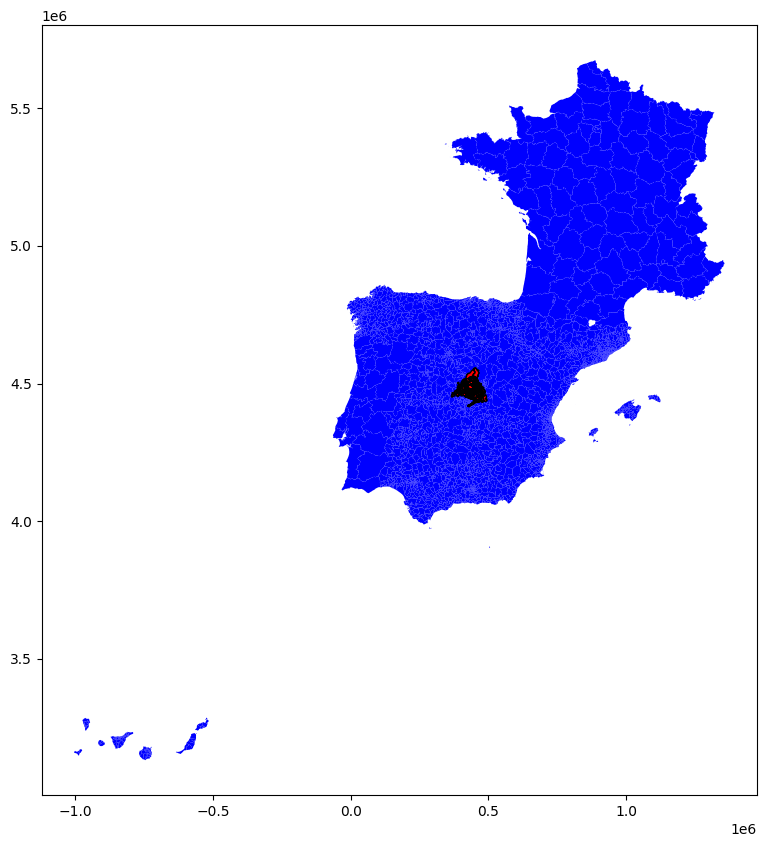

In [10]:
ax = gdf.plot(color='blue', figsize=(10, 10))
gdf[gdf['ID'].str.startswith("28")].plot(ax=ax, color='red', edgecolor='black')
plt.show()

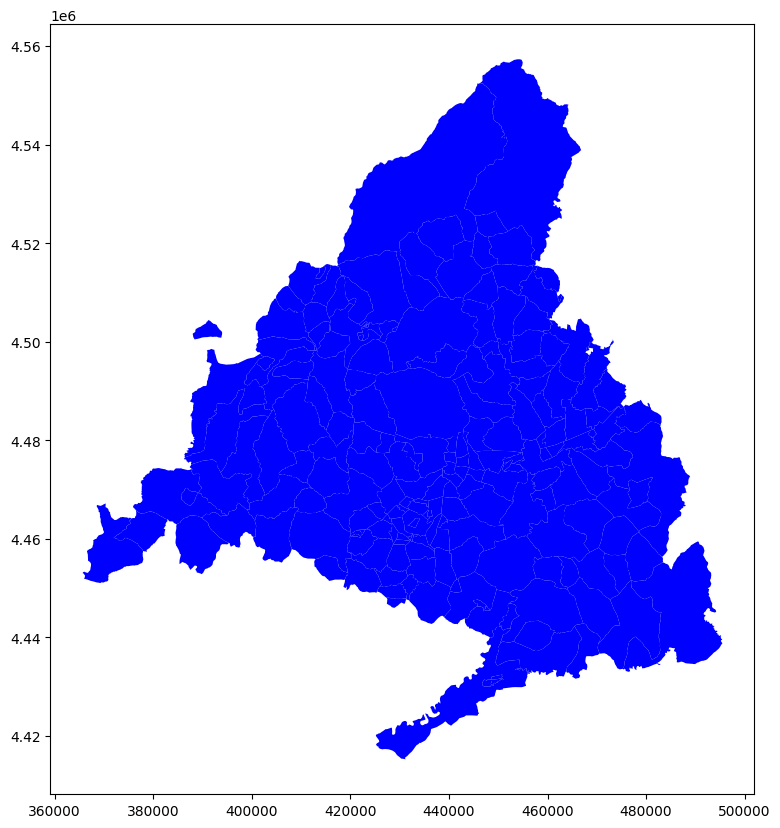

In [11]:
ax = gdf[gdf['ID'].str.startswith("28")].plot(color='blue', figsize=(10, 10)) # Comunidad de Madrid

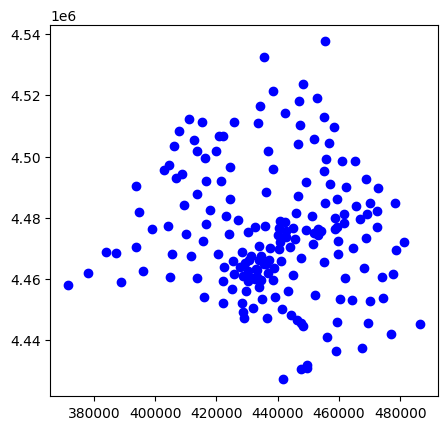

In [15]:
ax = centroides[centroides['ID'].str.startswith("28")].plot(color='blue', figsize=(5, 5))

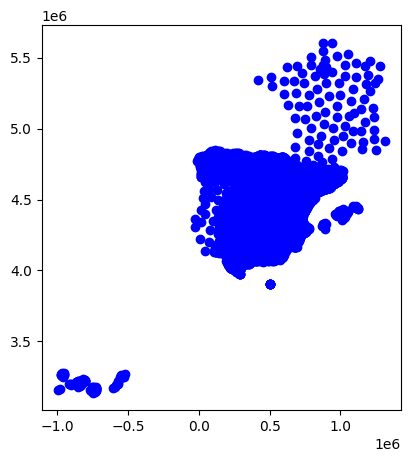

In [16]:
ax = centroides.plot(color='blue', figsize=(5, 5))

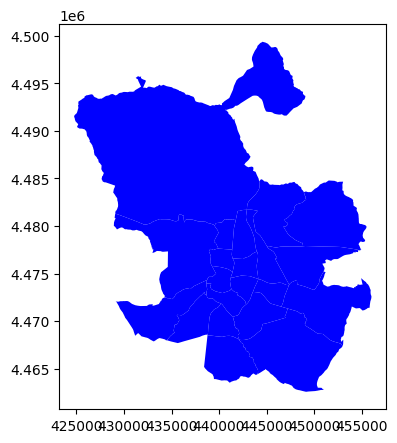

In [17]:
ax = madrid_city_gdf.plot(color='blue', figsize=(5, 5))

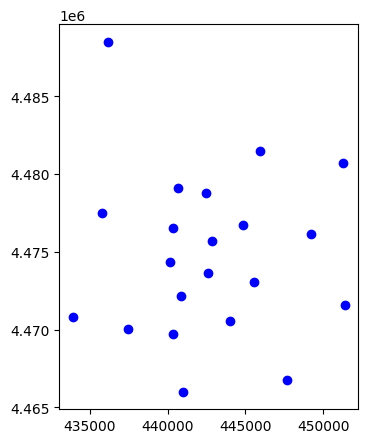

In [19]:
ax = madrid_city_centroids.plot(color='blue', figsize=(5, 5))